# CS530 HW8

#### Question 1. (4 points)

a. For classification trees, implement three functions to calculate the (1) cross-entropy, (2) Gini index, and (3) misclassification error. Assume binary classification (labels are 0’s and 1’s). The functions takes p_1, the probability of a record belong to class k=1, as input.

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor as dt
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
#def cal_cross_entropy(p):
#    cross_entropy = -np.sum((p)*np.log(p))
#    return cross_entropy

def cal_cross_entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2(1 - p)

def cal_gini_index(p):
    gini_index=np.sum(p*(1-p))
    return gini_index

def cal_misclassification_error(p):
    return 1- np.max([p, 1 - p])


b. Apply the three functions you implemented in 1a on the training test (train.csv) of the heart-disease dataset. Choose the 'age' variable as the root node. Use each value in the 'age' variable as the splitting value. Plot the cross entropy, Gini index, and misclassification error over age on the two child nodes after splitting.

In [5]:
# Your code goes here
train=pd.read_csv("data/train.csv")
x=train['age'].values
xy = train[['target','age']].values 
y=train['target'].values

#Sorting the data based on column age
xy = np.array(xy)
x_y_sorted = xy[xy[:, 1].argsort()]

In [6]:
i=0
p_1_left=[]
p_1_right=[] 
p_1_l=0
p_1_r=0
counter1=0

for i in range(len(x)):
    if x_y_sorted[i,0]==1:
        counter1=counter1+1
    if x_y_sorted[i,0]==0:
        counter1=counter1+0        
    p_1_l=0
    p_1_r=0 
    p_1_l=counter1/(i+1)
    p_1_r=(117-counter1)/(len(x)-i)
    p_1_left.append(p_1_l)
    p_1_right.append(p_1_r)

In [7]:
gin1=[]
gin2=[]
for i in range(len(x)):
    gin_l=cal_gini_index(p_1_left[i])
    gin1.append(gin_l)
for i in range(len(x)):
    gin_r=cal_gini_index(p_1_right[i])
    gin2.append(gin_r)
ent1=[]
ent2=[]
for i in range(len(x)):
    ent_l=cal_cross_entropy(p_1_left[i])
    ent1.append(ent_l)
for i in range(len(x)):
    ent_r=cal_cross_entropy(p_1_right[i])
    ent2.append(ent_r)

err1=[]
err2=[]
for i in range(len(x)):
    err_l=cal_misclassification_error(p_1_left[i])
    err1.append(err_l)
for i in range(len(x)):
    err_r=cal_misclassification_error(p_1_right[i])
    err2.append(err_r)


C:\Anaconda3\envs\cs530\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
C:\Anaconda3\envs\cs530\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


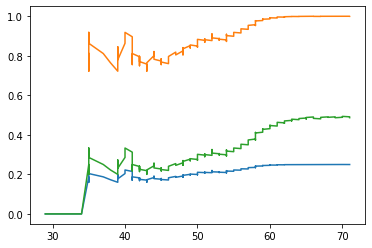

In [8]:
plt.plot(x_y_sorted[:,1],gin1)
plt.plot(x_y_sorted[:,1],ent1)
plt.plot(x_y_sorted[:,1],err1)

In [ ]:
#plt.plot(x_y_sorted[:,1],gin2)
#plt.plot(x_y_sorted[:,1],ent2)
#plt.plot(x_y_sorted[:,1],err2)


c. Discuss what you find in 1b. What age would you choose for the splitting value?

In [ ]:
# Your code goes here

In [ ]:
#While I was expecting to get a concave down parabola based the research I did on net, but I am getting the above graph which while ocsillating the general trend is increasing for all gini index, entropy and classification error. Iw ould say the results are valid becasuse at least they in range of [0,1]. For splitting value I would choose 38 because it has the minimum error and minimum gini index.

#### Question 2. (3 points)

a. Implement a function to carry out the regression tree algorithm using the greedy approach. This implementation assumes the tree only splits twice. The function takes inputs X_train, y_train, and X_test, and return a prediction y_pred for X_test.

In [ ]:
def regression_tree(X_train, y_train, X_test):
    regressor = dt(criterion = 'mse', splitter = 'best', max_depth = 2).fit(X_train, y_train) 
    y_pred = regressor.predict(X_test)
    return y_pred

b. Use the function you implemented in 2a to predict on the synthetic data below.

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
# make a linearly separable dataset
X, y = make_regression(n_samples=1000,
                       n_features=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
# Your code goes here
y_pred = regression_tree(X_train, y_train, X_test)
y_pred

c. Do you think this implementation of the regression tree is a good model for this dataset? Explain.

In [ ]:
# Your discussion goes here

#### Question 3. (3 points)

a. Use the scikit-learn package to run Bagging and Random Forest on the heart-disease dataset and predict on its test set. Use cross-validation to find the best parameters for these algorithms.

In [ ]:
# Your code goes here

b. On the same axes, plot the ROC curves for the two algorithms with the best parameters that you found in 3a. Annotate their AUC values and compare their performance. 

In [ ]:
# Your code goes here

c. Explain your results in 3b. Why might the results vary across algorithms?

In [ ]:
# Your discussion goes here